**handson用資料としての注意点**

普通、同じセル上で何度も試行錯誤するので、最終的に上手くいったセルしか残らず、失敗したセルは残りませんし、わざわざ残しません。

今回はhandson用に 試行・思考過程を残したいと思い、エラーやミスが出ても下のセルに進んで処理を実行するようにしています。

notebookのセル単位の実行ができるからこそのやり方かもしれません。良い。

（下のセルから文は常体で書きます。）

kunai (@jdgthjdg)

---


# 今までの復習 + 追加の分析ネタ

---

# AMeDASのデータを使って、天候との関連があるかを知りたい

* AMeDASのエクセルファイルも同様の前処理が必要  
* シートも複数ある

<br>

例
1. 降水量と花粉
1. 気温と花粉

---


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import numpy as np
import qgrid
#設定でDataFrameなどが長く表示されないようにします（画面領域の消費を抑えてhandsonをしやすくするため）
# 長い場合の途中の省略表示(...)を出す閾値の設定（折り返しとは無関係）
pd.set_option('max_rows',10)
pd.set_option('max_columns',20) # これを超えたら全部は表示しない。 A B C ... X Y Z のように途中を省く。

In [29]:
kafun = pd.read_pickle("kafun04.pkl")
kafun.head(2)

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2008-02-01 00:00:00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-02-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,8.0,0.0


↓ ここからは01〜05のipynbファイルを見直しながら自由に記述！
---


In [3]:
from pathlib impo    return dfrt Path
base_dir = Path("../../../data")
base_dir.exists()

True

In [40]:
kansai_kafun_files = []
for p in base_dir.glob("*_kansai/*"):
    # AMeDASだけ弾くと .lockファイルも入ってしまうので、読めない謎の文字で引っ掛けてみる
    if p.name.startswith("AMe"):
        kansai_kafun_files.append(p)
kansai_kafun_files

[PosixPath('../../../data/2010_kansai/AMeDAS2010(è╓É╝).xls'),
 PosixPath('../../../data/2017_kansai/AMeDAS2017(è╓É╝).xlsx'),
 PosixPath('../../../data/2015_kansai/AMeDAS2015(è╓É╝).xlsx'),
 PosixPath('../../../data/2009_kansai/AMeDAS2009(è╓É╝).xls'),
 PosixPath('../../../data/2014_kansai/AMeDAS2014(è╓É╝).xls'),
 PosixPath('../../../data/2012_kansai/AMeDAS2012(è╓É╝).xls'),
 PosixPath('../../../data/2008_kansai/AMeDAS2008(è╓É╝).xls'),
 PosixPath('../../../data/2016_kansai/AMeDAS2016(è╓É╝).xlsx'),
 PosixPath('../../../data/2018_kansai/AMeDAS2018(è╓É╝).xlsx'),
 PosixPath('../../../data/2011_kansai/AMeDAS2011(è╓É╝).xls'),
 PosixPath('../../../data/2013_kansai/AMeDAS2013(è╓É╝).xls')]

In [41]:
path = kansai_kafun_files[0]

In [42]:
df = pd.read_excel(path, sheet_name=1, skiprows=0)
df.tail()

,月,日,時,彦根市役所,滋賀県琵琶湖・環境科学研究センター,滋賀県高島県事務所,滋賀県森林センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北出張所,...,兵庫県立健康環境科学研究センター,北山緑化植物園（西宮市都市整備公社）,兵庫県篠山庁舎,兵庫みどり公社西播磨事務所,奈良県保健環境研究センター,奈良県吉野保健所,奈良県高田総合庁舎,和歌山地方気象台,和歌山県西牟婁振興局庁舎,和歌山県農林水産総合技術センター林業試験場中辺路試験地
2875,5,31,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
2876,5,31,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
2877,5,31,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
2878,5,31,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
2879,5,31,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0


In [43]:
df.dtypes

月                                int64
日                                int64
時                                int64
彦根市役所                          float64
滋賀県琵琶湖・環境科学研究センター              float64
                                ...   
奈良県吉野保健所                        object
奈良県高田総合庁舎                      float64
和歌山地方気象台                       float64
和歌山県西牟婁振興局庁舎                   float64
和歌山県農林水産総合技術センター林業試験場中辺路試験地     object
Length: 23, dtype: object

In [44]:
df["年"].astype(str)+"/"+df["月"].astype(str)+"/"+df["日"].astype(str)+"/"+(df["時"]-1).astype(str) # 時から1引いてる

KeyError: '年'

In [45]:
year = path.name[6:10]
str_concat_h0_23 = year+"/"+df["月"].astype(str)+"/"+df["日"].astype(str)+"/"+(df["時"]-1).astype(str) # 時から1引いてる
df["date_hour"] = pd.to_datetime(str_concat_h0_23, format="%Y/%m/%d/%H")
df.set_index("date_hour", inplace=True)
df = df.drop(columns=["月","日","時",])
ame = df

In [46]:
ame.iloc[:,0]

date_hour
2010-02-01 00:00:00    0.0
2010-02-01 01:00:00    0.0
2010-02-01 02:00:00    0.0
2010-02-01 03:00:00    0.0
2010-02-01 04:00:00    0.0
                      ... 
2010-05-31 19:00:00    0.0
2010-05-31 20:00:00    0.0
2010-05-31 21:00:00    0.0
2010-05-31 22:00:00    0.0
2010-05-31 23:00:00    0.0
Name: 彦根市役所, Length: 2880, dtype: float64

dtype も float64 なので、ゴミデータもなさそう。 （nanはあるかも）

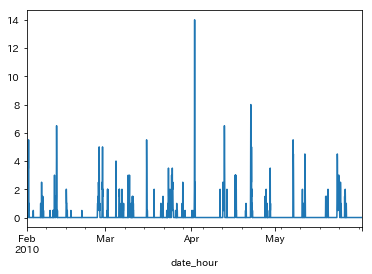

In [47]:
ame.iloc[:,0].plot();

In [32]:
kafun.iloc[:,0]

date_hour
2008-02-01 00:00:00    0.0
2008-02-01 01:00:00    0.0
2008-02-01 02:00:00    0.0
2008-02-01 03:00:00    0.0
2008-02-01 04:00:00    0.0
                      ... 
2018-05-31 19:00:00    0.0
2018-05-31 20:00:00    0.0
2018-05-31 21:00:00    0.0
2018-05-31 22:00:00    0.0
2018-05-31 23:00:00    0.0
Name: 彦根市役所, Length: 31973, dtype: float64

<br>
花粉データにある行だけ取得したいので、数値で引けるilocよりも、名前でひけるlocを使う

In [49]:
kafun.columns[0]

'彦根市役所'

In [67]:
ame.loc[kafun.columns]

KeyError: "None of [Index(['彦根市役所', '滋賀県琵琶湖・環境科学研究センター', '京都府立医科大学', '京都府中丹東保健所', '京都市右京区役所京北合同庁舎',\n       '豊中市役所第一庁舎', '兵庫県立健康環境科学研究センター', '兵庫県篠山庁舎', '奈良県吉野保健所', '和歌山地方気象台',\n       '和歌山県西牟婁振興局庁舎'],\n      dtype='object')] are in the [index]"

KeyError  
<br>
kafunにあって、ame に無い列名があると怒られるから、　事前チェック・・・
<br>
<br>
<br>

いや・・・、　df.loc[y,x] なので、 行(y)方向の選択をしてしまっていた。（よくミスる）
<br>
<br>
　


In [68]:
ame.loc[:,kafun.columns]

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2010-02-01 00:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
2010-02-01 01:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
2010-02-01 02:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
2010-02-01 03:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
2010-02-01 04:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2010-05-31 19:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
2010-05-31 20:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
2010-05-31 21:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0


FutureWarning  
KeyError in the future, you can use .reindex() as an alternative.

Warning でた。（初回だけっぽい）そのうちエラーになるから reindex を使えとのこと。  
代替案を提示してくれるあたりが良いやつ。  

<br>
<br>
<br>
<br>

reindex でcolumns は知らんかったので、df.reindex shift+Tab で ドキュメント をざっくり見てみる
<br>
<br>
<br>



In [72]:
ame.reindex(columns=kafun.columns)

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2010-02-01 00:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
2010-02-01 01:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
2010-02-01 02:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
2010-02-01 03:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
2010-02-01 04:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2010-05-31 19:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
2010-05-31 20:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0
2010-05-31 21:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0


In [73]:
ame = ame.reindex(columns=kafun.columns)

In [74]:
kafun.columns,ame.columns # 一致している

(Index(['彦根市役所', '滋賀県琵琶湖・環境科学研究センター', '京都府立医科大学', '京都府中丹東保健所', '京都市右京区役所京北合同庁舎',
        '豊中市役所第一庁舎', '兵庫県立健康環境科学研究センター', '兵庫県篠山庁舎', '奈良県吉野保健所', '和歌山地方気象台',
        '和歌山県西牟婁振興局庁舎'],
       dtype='object'),
 Index(['彦根市役所', '滋賀県琵琶湖・環境科学研究センター', '京都府立医科大学', '京都府中丹東保健所', '京都市右京区役所京北合同庁舎',
        '豊中市役所第一庁舎', '兵庫県立健康環境科学研究センター', '兵庫県篠山庁舎', '奈良県吉野保健所', '和歌山地方気象台',
        '和歌山県西牟婁振興局庁舎'],
       dtype='object'))